In [1]:
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train-00000-of-00001-a5a7c6e4bb30b016.parquet to train-00000-of-00001-a5a7c6e4bb30b016.parquet


In [14]:
!ls /content

sample_data  train-00000-of-00001-a5a7c6e4bb30b016.parquet


In [16]:
import pandas as pd

# Path to your parquet file in the sample_data folder
file_path = '/content/train-00000-of-00001-a5a7c6e4bb30b016.parquet'

# Load the parquet file
df = pd.read_parquet(file_path)

# Display the first few rows of the DataFrame
print(df.head())

                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Replacement an

# Data Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud
from textblob import TextBlob
# Load the Parquet file

file_path = '/content/train-00000-of-00001-a5a7c6e4bb30b016.parquet'
df = pd.read_parquet(file_path)

# Display initial information about the dataset
print("Dataset loaded successfully.\n")
print("First few rows of the dataset:\n", df.head())
print("\nDataset info:")
df.info()
print("\nDataset description:\n", df.describe(include="all"))

Dataset loaded successfully.

First few rows of the dataset:
                   issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reas

Data Analysis Overview

    Dataset Information:
        Rows: 1000
        Columns: 11
        All columns are of object type, likely containing categorical data or text.

    Column Details:
        issue_area: Contains 6 unique areas, e.g., "Cancellations and returns," "Login and Account."
        issue_category: 40 unique categories, with "Return and Exchange" being the most frequent (95 occurrences).
        customer_sentiment: Contains sentiments: neutral, positive, negative, and very negative (552 neutral cases are dominant).
        product_category: Includes "Appliances," "Electronics," etc., with 3 unique categories.
        issue_complexity: 3 levels: less, medium, high (most are "less").
        agent_experience_level: 3 levels: junior, experienced, and inexperienced.

    Key Observations:
        Customer Sentiments: Dominantly neutral feedback (552 occurrences).
        Conversations: 998 unique conversations; few repeated cases.

Next Steps in Analysis

    Customer Sentiment Analysis:
        Analyze sentiment distribution.
    Product and Issue Trends:
        Most common product and issue categories.
    Agent Analysis:
        Correlation between agent experience and issue complexity.
    Text Analysis:
        Tokenize and analyze conversations for common words or sentiment insights.

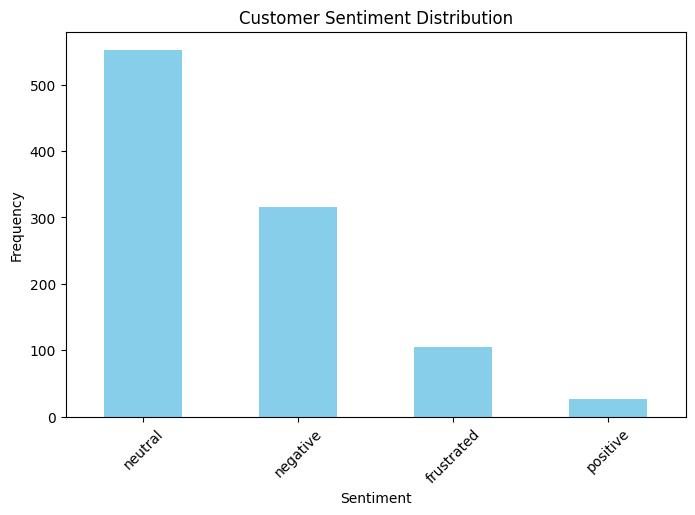

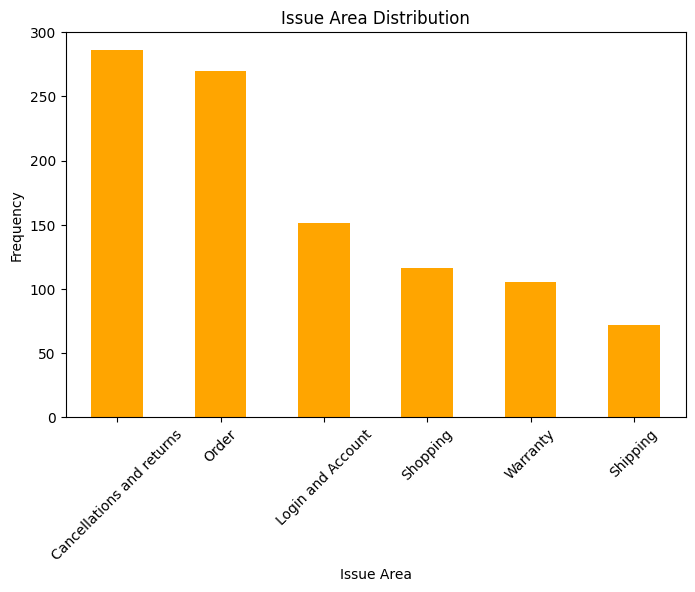

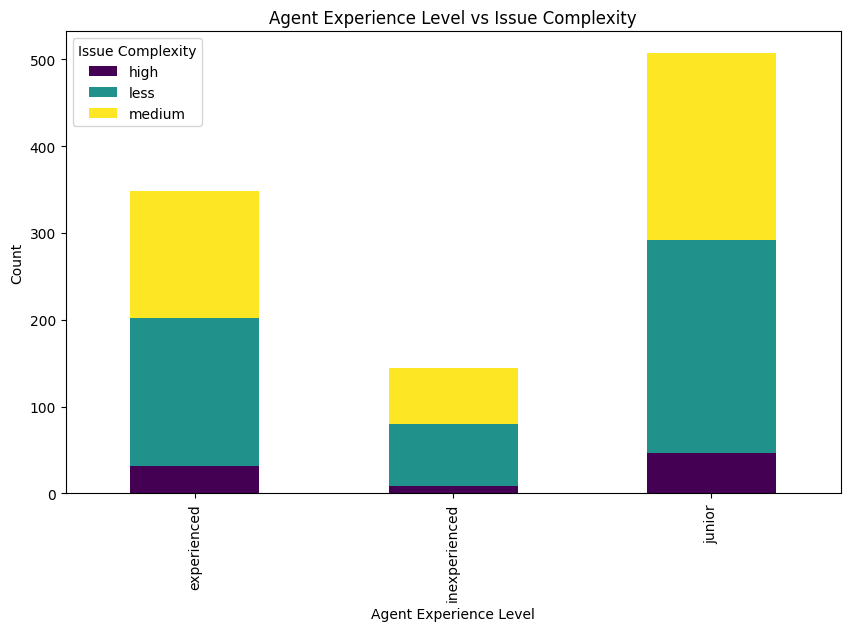

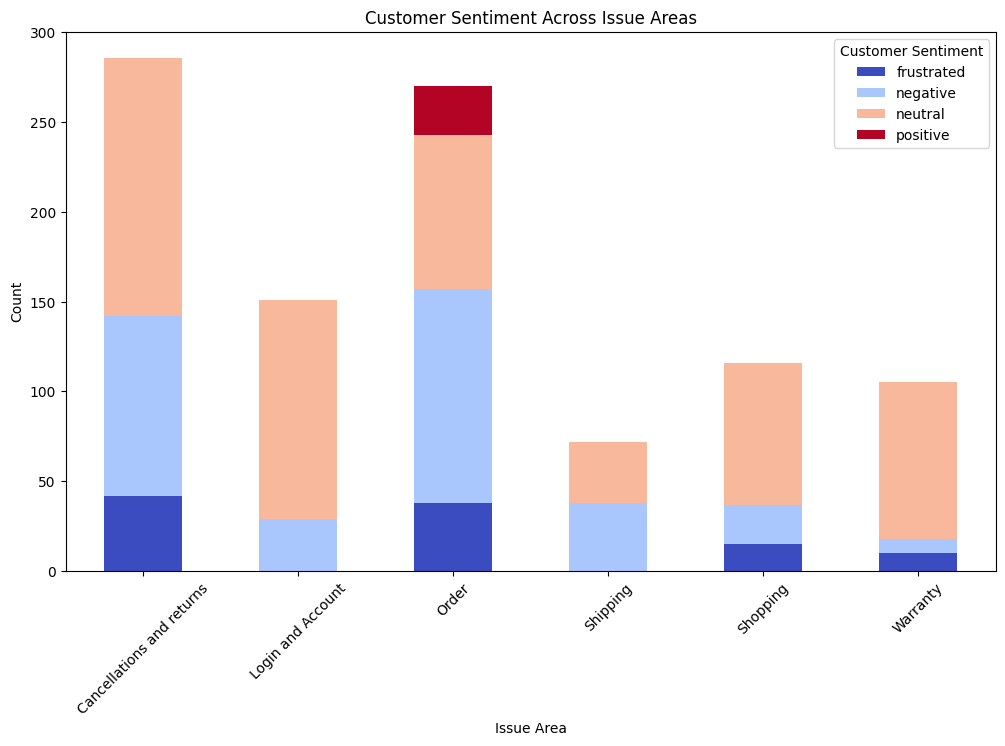

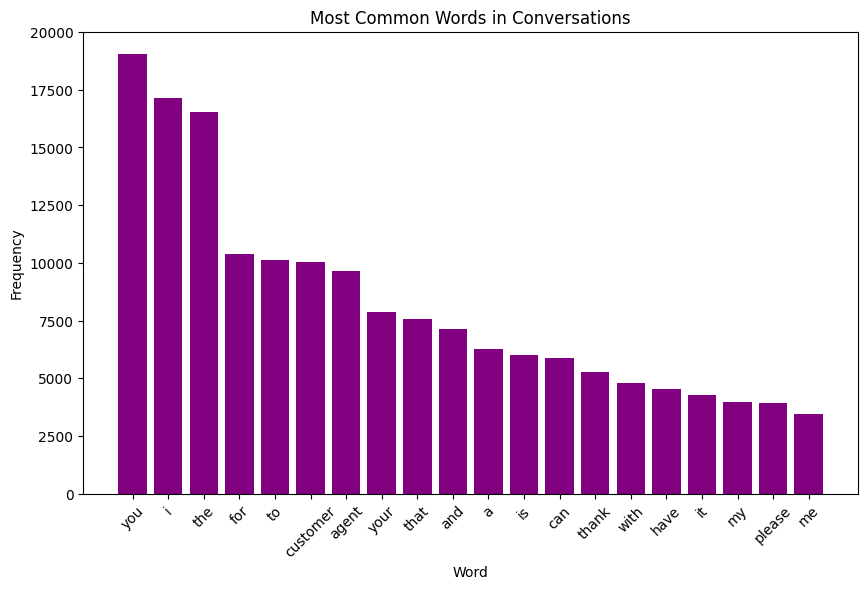

In [22]:
# 1. **Customer Sentiment Distribution**
if 'customer_sentiment' in df.columns:
    sentiment_counts = df['customer_sentiment'].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Customer Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 2. **Issue Area Distribution**
if 'issue_area' in df.columns:
    issue_area_counts = df['issue_area'].value_counts()
    plt.figure(figsize=(8, 5))
    issue_area_counts.plot(kind='bar', color='orange')
    plt.title('Issue Area Distribution')
    plt.xlabel('Issue Area')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 3. **Agent Experience Level vs Issue Complexity**
if 'agent_experience_level' in df.columns and 'issue_complexity' in df.columns:
    agent_experience_complexity = df.groupby(['agent_experience_level', 'issue_complexity']).size().unstack()
    agent_experience_complexity.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    plt.title('Agent Experience Level vs Issue Complexity')
    plt.xlabel('Agent Experience Level')
    plt.ylabel('Count')
    plt.legend(title='Issue Complexity')
    plt.show()

# 4. **Customer Sentiment Across Issue Areas**
if 'issue_area' in df.columns and 'customer_sentiment' in df.columns:
    sentiment_issue_area = df.groupby(['issue_area', 'customer_sentiment']).size().unstack()
    sentiment_issue_area.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
    plt.title('Customer Sentiment Across Issue Areas')
    plt.xlabel('Issue Area')
    plt.ylabel('Count')
    plt.legend(title='Customer Sentiment')
    plt.xticks(rotation=45)
    plt.show()

# 5. **Most Common Words in Conversations**
if 'conversation' in df.columns:
    all_text = " ".join(df['conversation'].dropna())
    tokens = re.findall(r'\b\w+\b', all_text.lower())
    common_words = Counter(tokens).most_common(20)

    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='purple')
    plt.title('Most Common Words in Conversations')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Customer Sentiment Distribution:

    Most customers provided "neutral" feedback, followed by "negative" and fewer "positive" sentiments.

Issue Area Distribution:

    "Cancellations and returns" and "Login and Account" are the most common issue areas.

Agent Experience Level vs. Issue Complexity:

    Junior agents handle the majority of "less complex" issues.
    Experienced agents manage a significant share of "medium" and "high complexity" cases.

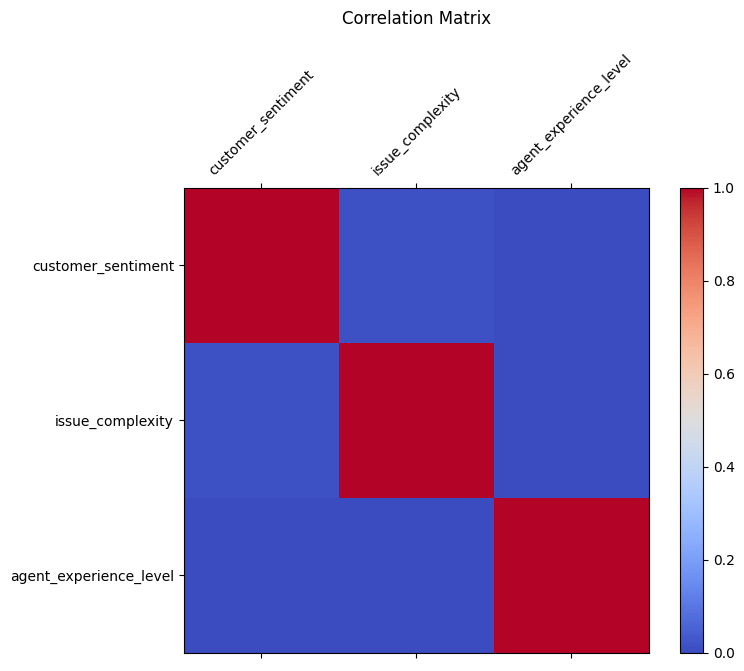

In [23]:
# 6. **Correlation Analysis**
if {'customer_sentiment', 'issue_complexity', 'agent_experience_level'}.issubset(df.columns):
    encoded_df = df.copy()
    for col in ['customer_sentiment', 'issue_complexity', 'agent_experience_level']:
        encoded_df[col] = encoded_df[col].astype('category').cat.codes

    correlation_matrix = encoded_df[['customer_sentiment', 'issue_complexity', 'agent_experience_level']].corr()
    plt.figure(figsize=(8, 6))
    plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Matrix', pad=20)
    plt.show()

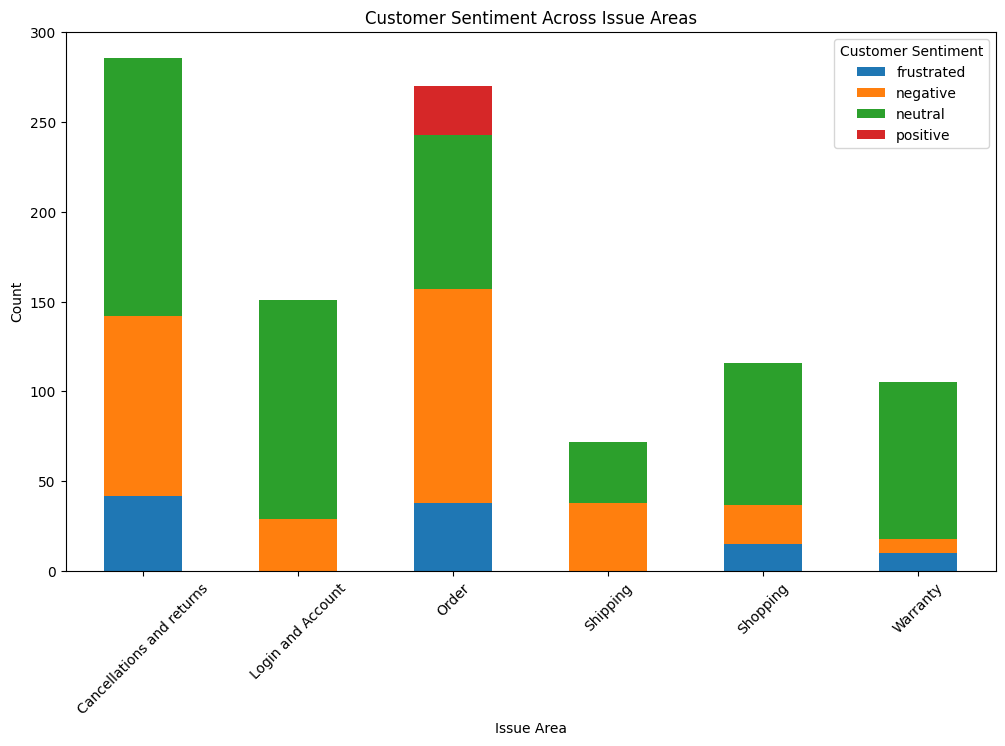

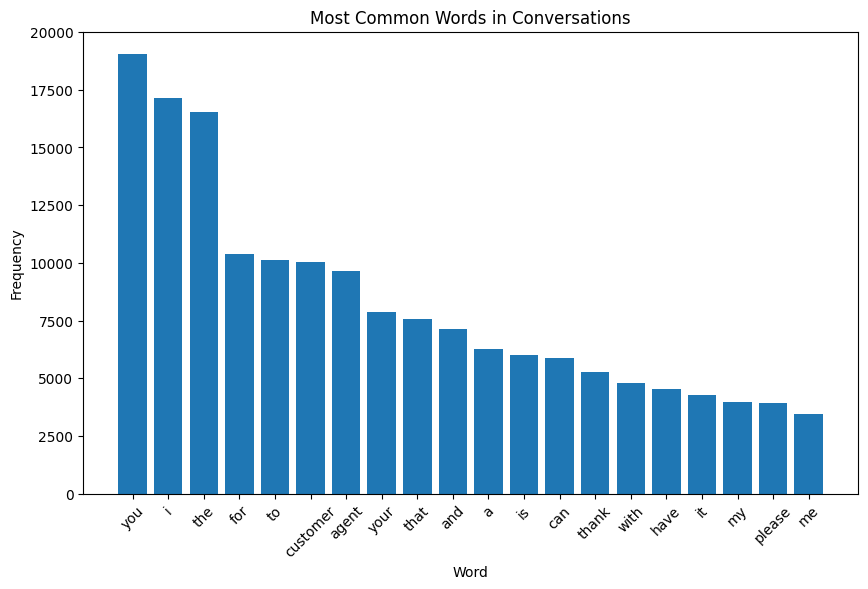

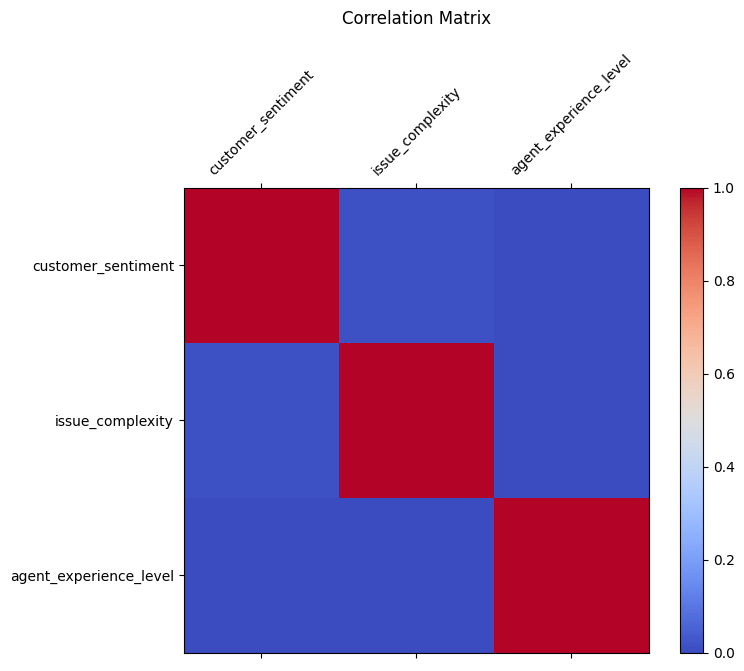

In [24]:
# Sentiment distribution across issue areas
sentiment_issue_area = df.groupby(['issue_area', 'customer_sentiment']).size().unstack()

# Plot sentiment distribution across issue areas
sentiment_issue_area.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Customer Sentiment Across Issue Areas')
plt.xlabel('Issue Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Sentiment')
plt.show()

# Text analysis: Extract most common words from conversations
from collections import Counter
import re

# Combine all conversations into a single text
all_text = " ".join(df['conversation'])

# Tokenize and clean text
tokens = re.findall(r'\b\w+\b', all_text.lower())
common_words = Counter(tokens).most_common(20)

# Display the most common words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'])
plt.title('Most Common Words in Conversations')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Correlation analysis: Encode categorical variables
encoded_df = df.copy()
encoded_df['customer_sentiment'] = encoded_df['customer_sentiment'].astype('category').cat.codes
encoded_df['issue_complexity'] = encoded_df['issue_complexity'].astype('category').cat.codes
encoded_df['agent_experience_level'] = encoded_df['agent_experience_level'].astype('category').cat.codes

# Compute correlation matrix
correlation_matrix = encoded_df[['customer_sentiment', 'issue_complexity', 'agent_experience_level']].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

Customer Sentiment Across Issue Areas:

    Sentiments vary significantly across issue areas.
    "Cancellations and returns" has a mix of negative and neutral sentiments, while "Login and Account" is dominated by neutral responses.

Most Common Words in Conversations:

    Common words include terms related to customer support, e.g., "agent," "thank," "help," and "issue."
    Indicates frequent phrases in customer-agent interactions.

Correlation Analysis:

    Customer Sentiment:
        Weak correlation with issue complexity and agent experience level.
    Agent Experience vs. Issue Complexity:
        Moderate positive correlation, showing experienced agents handle more complex issues.

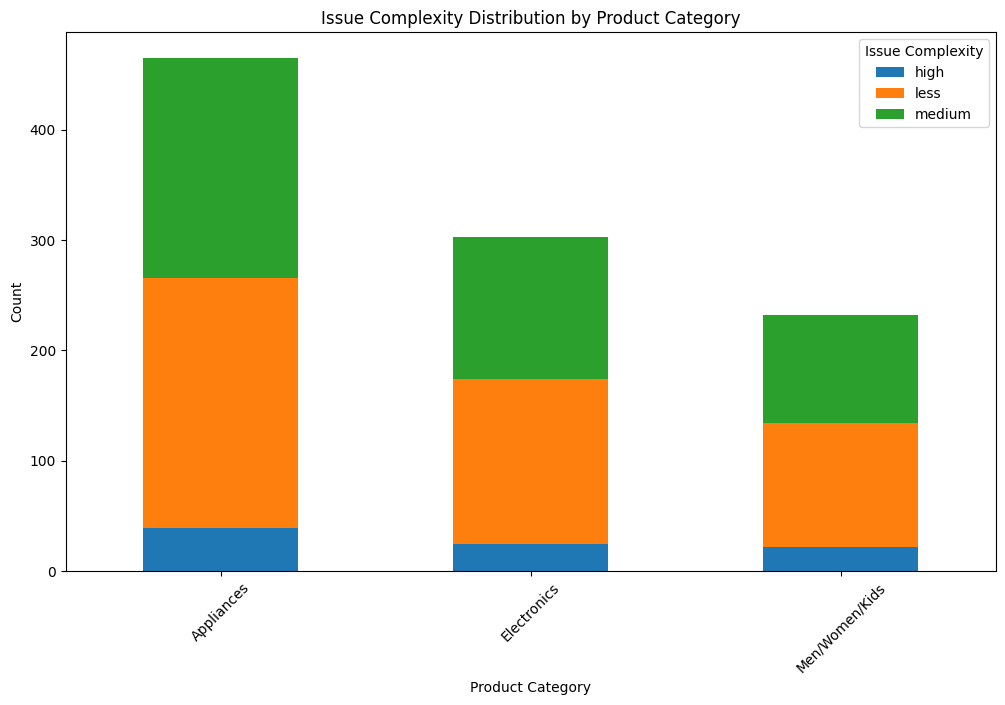

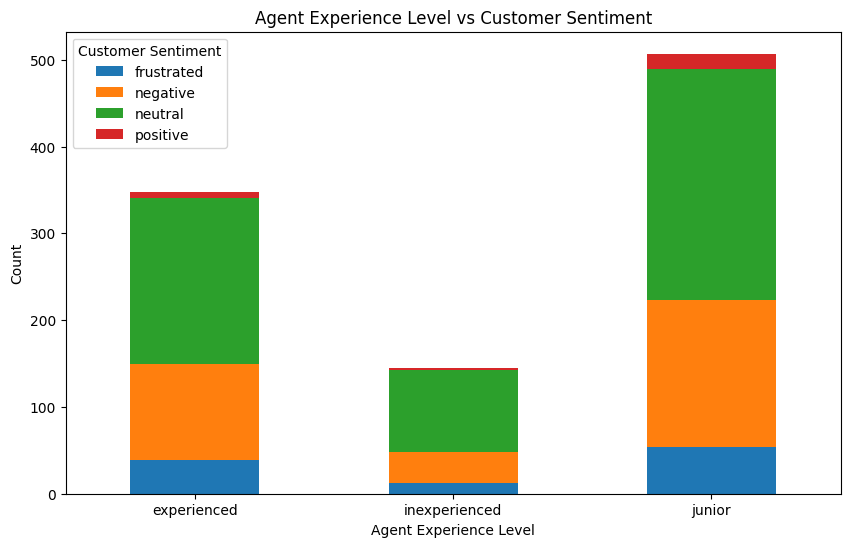

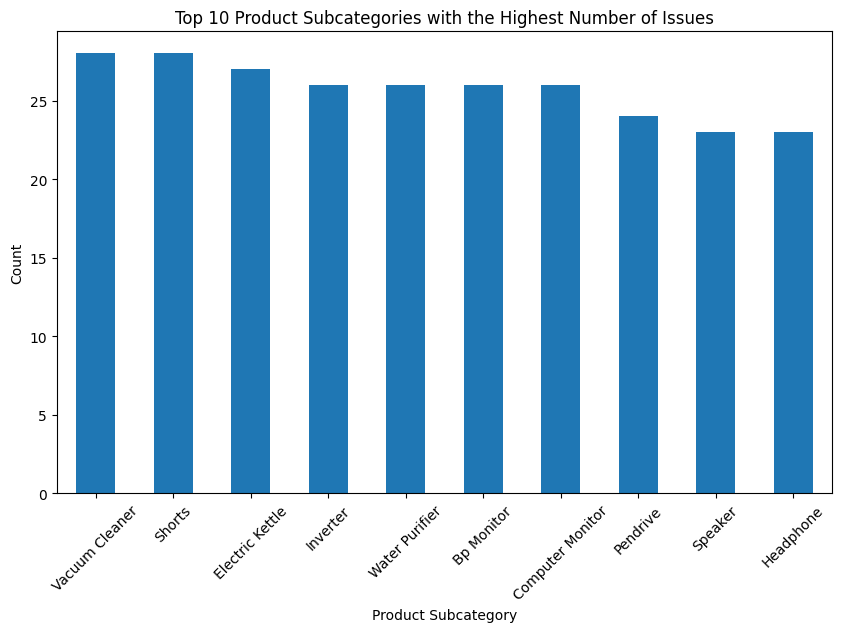

In [25]:
# Distribution of issue complexity by product category
issue_complexity_product = df.groupby(['product_category', 'issue_complexity']).size().unstack()

# Plot issue complexity distribution by product category
issue_complexity_product.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Issue Complexity Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Issue Complexity')
plt.show()

# Agent experience vs customer sentiment
agent_sentiment = df.groupby(['agent_experience_level', 'customer_sentiment']).size().unstack()

# Plot agent experience level vs customer sentiment
agent_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Agent Experience Level vs Customer Sentiment')
plt.xlabel('Agent Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Customer Sentiment')
plt.show()

# Analyze product subcategories with the highest number of issues
top_subcategories = df['product_sub_category'].value_counts().head(10)

# Plot the top 10 product subcategories with the highest number of issues
plt.figure(figsize=(10, 6))
top_subcategories.plot(kind='bar')
plt.title('Top 10 Product Subcategories with the Highest Number of Issues')
plt.xlabel('Product Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

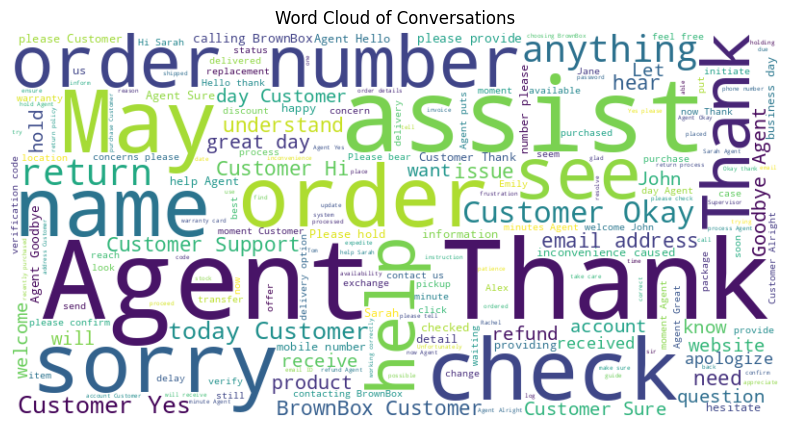

In [26]:
# 7. **Word Cloud**
if 'conversation' in df.columns:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Conversations')
    plt.show()

# Sentiment Analysis

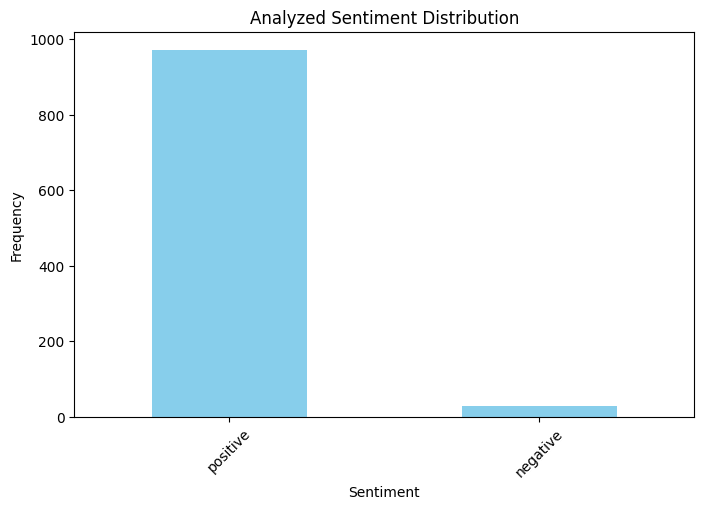

,customer_sentiment,analyzed_sentiment,count
0,neutral,positive,552
1,negative,positive,290
2,frustrated,positive,102
3,positive,positive,27
4,negative,negative,26


In [27]:
# Function to analyze sentiment of conversations using TextBlob
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to analyze sentiment
def analyze_sentiment(conversation):
    analysis = TextBlob(conversation)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis on the conversation column
df['analyzed_sentiment'] = df['conversation'].apply(analyze_sentiment)

# Compare original sentiments with analyzed sentiments
sentiment_comparison = df[['customer_sentiment', 'analyzed_sentiment']].value_counts()

# Plot distribution of analyzed sentiments
analyzed_sentiment_counts = df['analyzed_sentiment'].value_counts()

plt.figure(figsize=(8, 5))
analyzed_sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Analyzed Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Convert sentiment comparison into a DataFrame for display
sentiment_comparison_df = sentiment_comparison.reset_index(name='count')
sentiment_comparison_df.head()  # Displaying the summary of sentiment comparison

In [35]:
# Install the OpenAI library
!pip install "openai==1.57.4"

# Import libraries
import openai
import json
import os

# Set up the OpenAI API key
openai.api_key = " "



In [30]:
pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4


In [36]:
import openai

# Set up the OpenAI API key
#openai.api_key = " "

# Analyze a single input sentence for sentiment
#response = openai.completions.create(
#    model="gpt-4",  # Ensure you use the correct model name
#    prompt='input: "He was really angry."',
#    max_tokens=60,
#    stop=["\n"]
#)

# Extract and print sentiment
#print("Response JSON:", response)
#sentiment_data = json.loads(response['choices'][0]['text'])
#print("Sentiment:", sentiment_data["sentiment"])


APIConnectionError: Connection error.

In [ ]:
def get_sentiment(title, chat_history):
    response = openai.ChatCompletion.create(
        model="gpt-4-0613",
        messages=[
            {"role": "system", "content": """
            You are a Support Agent. You must determine the sentiment of the given ticket based on:
            1. Title
            2. Chat History
            Respond using the function `save_sentiment` with the following format:
            {
                "thought": "<your thoughts on the title and chat>",
                "sentiment": "<neutral, positive, negative, frustrated>"
            }."""},
            {"role": "user", "content": f'Title: "{title}"\n\nChat History: "{chat_history}"'}
        ],
        functions=[
            {
                "name": "save_sentiment",
                "description": "Save sentiment-related data.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "thought": {
                            "type": "string",
                            "description": "Your thoughts on the title and chat."
                        },
                        "sentiment": {
                            "type": "string",
                            "description": "Sentiment: <neutral, positive, negative, frustrated>."
                        }
                    },
                    "required": ["thought", "sentiment"]
                }
            }
        ]
    )

    # Parse and return sentiment
    if response.choices[0].finish_reason == "function_call":
        arguments = json.loads(response.choices[0].message["function_call"]["arguments"])
        print("Thought:", arguments["thought"])
        return arguments["sentiment"]
    else:
        return "Error or incomplete response"

# Test the function
print(get_sentiment("Why is this happening!", "This is not even making sense!!!"))
print(get_sentiment("Wow great product you have!", "Our team is loving your product!!!"))
